In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
i = 3
sampled1 = np.load("samples/P200E10_1000T_fullstate_nofinalpos_hardwarestate_rotmat/planned_traj1_%s_new.npy" % i, allow_pickle=True)
sampled2 = np.load("samples/P200E10_1000T_fullstate_nofinalpos_hardwarestate_rotmat/planned_traj2_%s_new.npy" % i, allow_pickle=True)

In [19]:
np.shape(sampled2)

(1000, 10)

In [20]:
sampled1[:5]

array([[ 0.1199245 ,  0.00984248,  0.2074947 , -0.00736188,  0.99756834,
         0.00183164,  0.99596692,  0.00749521,  0.06220697, -0.42748009],
       [ 0.1227185 ,  0.00676119,  0.2074037 , -0.00686299,  0.99718952,
         0.00197371,  0.993314  ,  0.00535968,  0.06253371, -0.07479125],
       [ 0.12692601,  0.00606179,  0.20768358, -0.00676208,  0.99813298,
         0.00184159,  0.99421738,  0.0083212 ,  0.06136841,  0.35666517],
       [ 0.12769478,  0.00387035,  0.20761096, -0.0066355 ,  0.99782373,
         0.00208859,  0.99604732,  0.0068468 ,  0.06166906, -0.09510771],
       [ 0.12881437,  0.00262288,  0.20775613, -0.00622531,  0.99765937,
         0.00210377,  0.99561881,  0.00632538,  0.06156798,  0.35877114]])

In [21]:
sampled2[:5]

array([[ 2.10382695e-01,  7.12548285e-03,  2.99666571e-02,
        -9.99757837e-01,  1.98555777e-03, -2.86453532e-04,
        -4.31499034e-03, -9.99726632e-01, -1.46348416e-02,
         8.03415514e+02],
       [ 2.11463821e-01,  7.15388840e-03,  2.98953391e-02,
        -9.99901814e-01,  1.22290679e-03, -2.70504755e-04,
        -4.16858642e-03, -9.98148258e-01, -1.32275348e-02,
         8.03832084e+02],
       [ 2.11204778e-01,  6.58826730e-03,  3.05841658e-02,
        -9.99501487e-01,  1.62596041e-03, -3.60640315e-04,
        -5.36919593e-03, -9.98150410e-01, -1.93166149e-02,
         8.04091161e+02],
       [ 2.11683128e-01,  7.24526968e-03,  3.32263482e-02,
        -9.99530663e-01,  1.42861936e-03, -2.97884043e-04,
        -4.32950242e-03, -9.96861494e-01, -1.84208387e-02,
         8.01991752e+02],
       [ 2.10425952e-01,  6.75326127e-03,  3.63283348e-02,
        -9.99816839e-01,  1.68027021e-03, -3.27271079e-04,
        -4.99245691e-03, -9.97452779e-01, -1.61355063e-02,
         8.

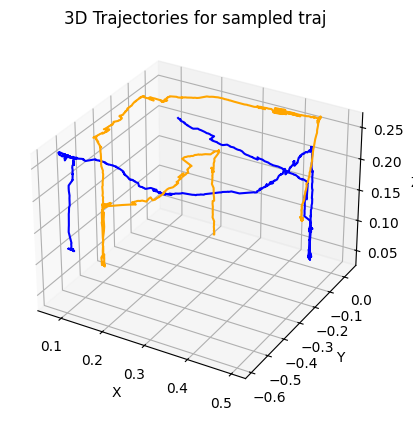

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectories(arr1: np.ndarray, arr2:np.ndarray):
    x1, y1, z1 = arr1[:, 0], arr1[:, 1], arr1[:, 2]
    x2, y2, z2 = arr2[:, 0], arr2[:, 1], arr2[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x1, y1, z1, color="blue")
    ax.plot(x2, y2, z2, color="orange")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Trajectories for sampled traj')
    plt.show()

plot_trajectories(sampled1, sampled2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# --- Configuration ---
# Set the index 'i' for the trajectory you want to plot
trajectory_index = 19

# Adjust the animation speed and smoothness
# A larger step will make the animation faster but less detailed.
frame_step = 5
# Frames per second for the output GIF
animation_fps = 15

# --- 2. Select the Trajectories ---
# Select the data for the two trajectories based on the index
# traj1_data = expert_states[trajectory_index, ::frame_step, :3]
# traj2_data = expert_states[trajectory_index, ::frame_step, 7:10]
traj1_data = sampled1[::frame_step, :3]
traj2_data = sampled2[::frame_step, :3]
num_frames = traj1_data.shape[0]


# --- 3. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize two empty 3D lines
line1, = ax.plot([], [], [], lw=2, label='Trajectory 1 (data[:, :, :3])')
line2, = ax.plot([], [], [], lw=2, label='Trajectory 2 (data[:, :, 7:10])')

# Set plot limits based on the data range to ensure everything is visible
all_data = np.vstack([traj1_data, traj2_data])
ax.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
ax.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
ax.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Animated 3D Trajectories for Index {trajectory_index}')
ax.legend()
ax.grid(True)


# --- 4. Define the Animation Update Function ---
def update(frame):
    """
    This function is called for each frame of the animation.
    It updates the data for the two lines, making them longer in each frame.
    """
    # Update trajectory 1
    line1.set_data(traj1_data[:frame+1, 0], traj1_data[:frame+1, 1])
    line1.set_3d_properties(traj1_data[:frame+1, 2])

    # Update trajectory 2
    line2.set_data(traj2_data[:frame+1, 0], traj2_data[:frame+1, 1])
    line2.set_3d_properties(traj2_data[:frame+1, 2])

    return line1, line2


# --- 5. Create and Save the Animation ---
# Create the animation object
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    blit=True
)

# Save the animation as a GIF file
output_filename = 'viz/P200E1_1000T_fullstate_nofinalpos/sampled0.gif'
print(f"Rendering and saving animation to '{output_filename}'...")
# The 'Pillow' writer is commonly available and good for creating GIFs.
ani.save(output_filename, writer='pillow', fps=animation_fps)
plt.close(fig) # prevent static plot from displaying
print("Animation saved successfully.")


Rendering and saving animation to 'viz/P200E1_1000T_fullstate_nofinalpos/sampled0.gif'...
Animation saved successfully.
